In [1]:
import pandas as pd
import copy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
df_copy = pd.read_csv("Wildfire_Dataset.csv")

C:\Users\erikw\AppData\Local\Temp\ipykernel_8348\3328195843.py:1: DtypeWarning: Columns (7,8,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv("Wildfire_Dataset.csv")


In [3]:
df = copy.deepcopy(df_copy)
df.drop(["Unnamed: 0", "FIPS_CODE"], axis=1, inplace=True)

In [4]:
columns = {'FIRE_YEAR': "year",
       'DISCOVERY_DATE': "discovery_date", 'DISCOVERY_DOY': "discovery_doy", 'DISCOVERY_TIME': "discovery_time",
       'NWCG_CAUSE_CLASSIFICATION': "cause_class", 'NWCG_GENERAL_CAUSE': "cause_description",
       'NWCG_CAUSE_AGE_CATEGORY': "cause_age", 'CONT_DATE': "contained_date", 'CONT_DOY': "contained_doy", 'CONT_TIME': "contained_time",
       'FIRE_SIZE': "size", 'FIRE_SIZE_CLASS': "size_class", 'LATITUDE': "latitude", 'LONGITUDE': "longitude", 
       'STATE': "state", 'COUNTY': "county", 'FIPS_CODE': "fips_code", 'FIPS_NAME': "fips_name"}

df.rename(mapper= lambda column: columns[column] if column in columns.keys() else column, axis=1, inplace=True)

df["discovery_month"] = df["discovery_date"].apply(lambda date: int(date.split("/")[0]))
df["discovery_day"] = df["discovery_date"].apply(lambda date: int(date.split("/")[1]))


def calc_duration(series: pd.Series):
     if any(math.isnan(x) if (type(x) is not str) else False for x in [series["contained_doy"], series ["discovery_doy"], series["contained_date"], series["year"]]):
          return None
     return series["contained_doy"] - series ["discovery_doy"] + (int(series["contained_date"].split("/")[-1]) - series["year"]) * 365 + 1

df["duration"] = df.apply(func= calc_duration, axis=1)

In [5]:
# Topic: How climate change affects wildfires in the USA



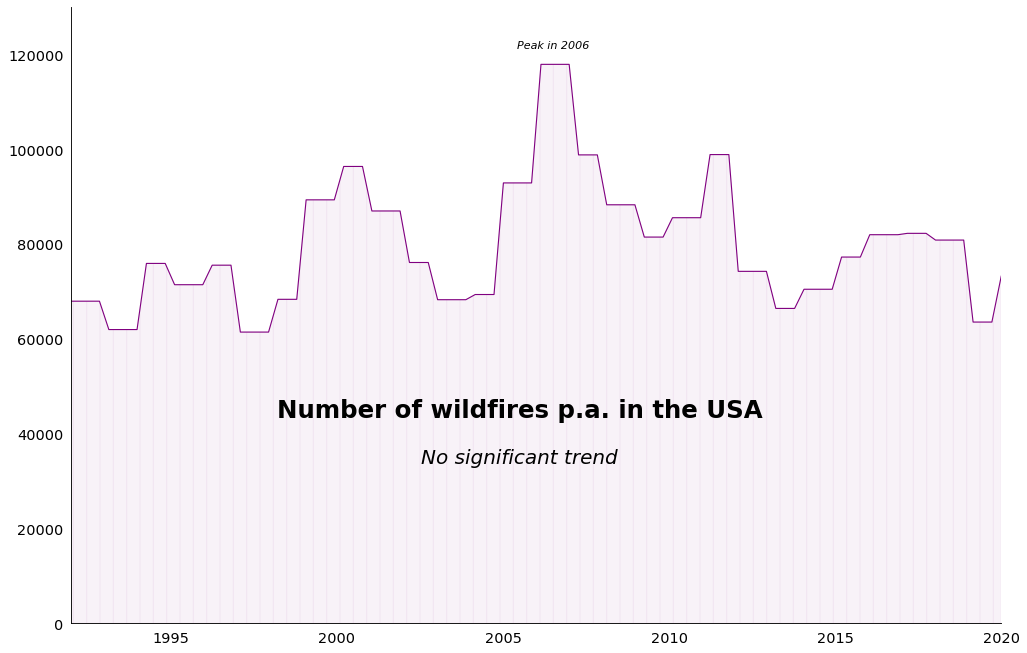

In [71]:
df_ = df.groupby("year").size()

x_new = np.linspace(1992, 2020, 100)  # Erhöht die Anzahl der Punkte für eine glattere Kurve
spl = make_interp_spline(df_.index, df_.values, k=0)  # Spline-Interpolation
y_smooth = spl(x_new)

fig, ax = plt.subplots(1, figsize=(15, 10), dpi=80)

mid_x = (x_new[0] + x_new[-1]) / 2
mid_y = (y_smooth.min() + y_smooth.max()) / 2

ax.annotate("Number of wildfires p.a. in the USA", xy=(2005.5, 45_000), xycoords='data', color="black", fontsize=22, ha='center', va='center', fontweight = "bold")
ax.annotate("No significant trend", xy=(2005.5, 35_000), xycoords='data', color="black", fontsize=18, ha='center', va='center', fontstyle = "oblique")
ax.annotate("Peak in 2006", xy=(2006.5, 122_000), xycoords='data', color="black", fontsize=10, ha='center', va='center', fontstyle = "oblique")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)

ax.set_ylim([0, 130_000])
ax.set_xlim([1992, 2020])
ax.fill_between(x_new, y_smooth, color="Purple", alpha=0.05, hatch="|")

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.plot(x_new, y_smooth, color="Purple", markersize=8, linewidth=1)


<Axes: xlabel='year'>

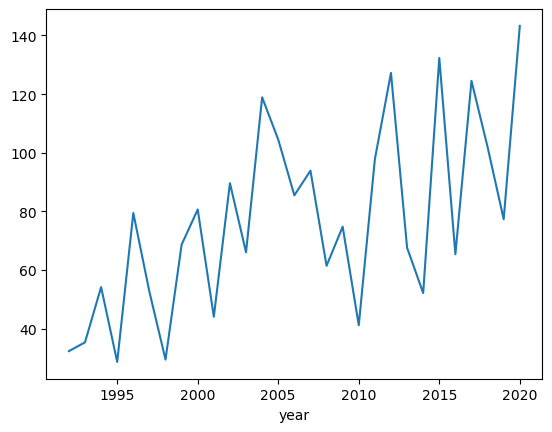

In [22]:
df.groupby("year")["size"].mean().plot()

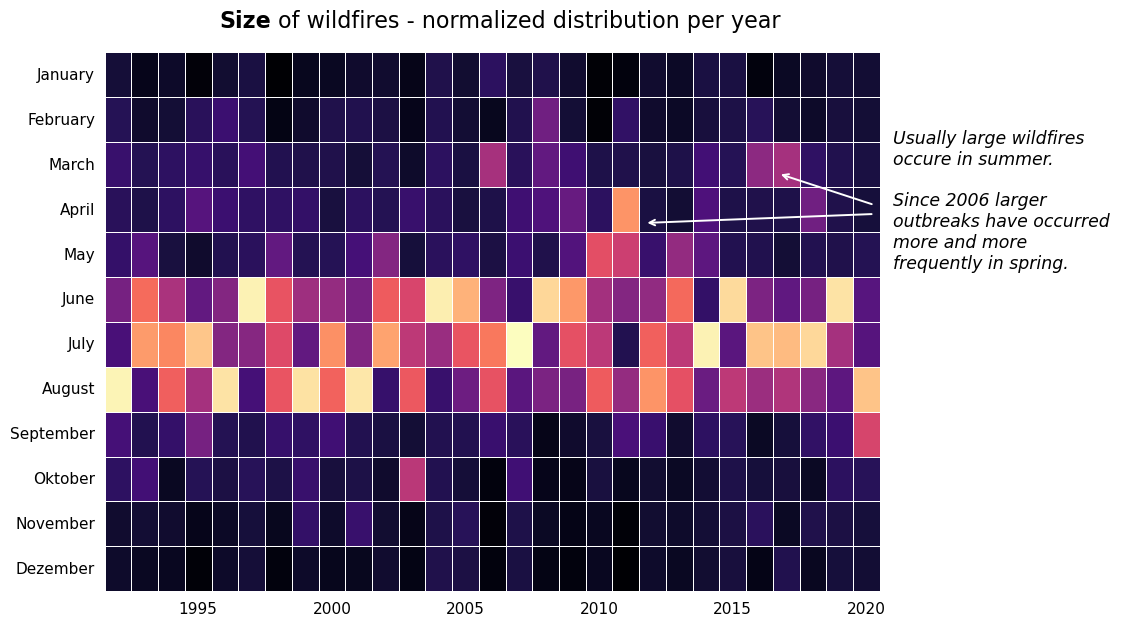

In [149]:
# Eriks Code

pivot_table = df.pivot_table(values="size", index='discovery_month', columns='year', aggfunc="sum", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

plt.text(x=29.5 , y=3.3, s="Usually large wildfires \noccure in summer. \n\nSince 2006 larger \noutbreaks have occurred \nmore and more \nfrequently in spring.", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=4.3 , y=-0.7, s="Size", fontsize=16, va='center', rotation=0, fontweight="bold")
plt.text(x=6.5 , y=-0.7, s="of wildfires - normalized distribution per year", fontsize=16, va='center', rotation=0)

plt.annotate("", xy=(20.2, 3.8), xytext=(28.8, 3.6), arrowprops=dict(facecolor='white', edgecolor='white', linewidth=1.4, arrowstyle='->'))
plt.annotate("", xy=(25.2, 2.7), xytext=(28.8, 3.4), arrowprops=dict(facecolor='white', edgecolor='white', linewidth=1.4, arrowstyle='->'))

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation = 0)

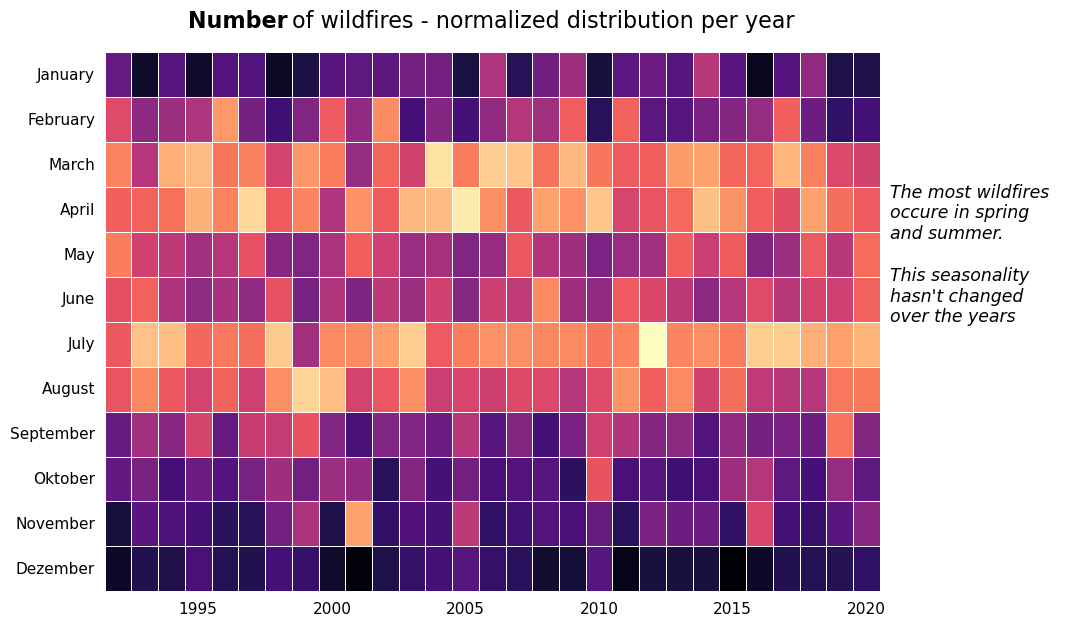

In [148]:
pivot_table = df.pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=3.1 , y=-0.7, s="Number", fontsize=16, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="of wildfires - normalized distribution per year", fontsize=16, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)



In [10]:
# Christophs Code

In [11]:
# Erik Code